# Session 07

## Databases, the Internet, and APIs

![Course Hero](images/hero.png)

## Secrets management

To be able to connect to many data sources we need Credentials. They can be usernames, passwords, keys, tokens and more. Those credentials should be kept secret at all times, because if they are compromised OUR DATA gets compromised. And that is a disaster.

[Equifax Data Breach]<https://en.wikipedia.org/wiki/2017_Equifax_data_breach>

There are several ways to keep our credentials safe, for example:

- Password managers ([LastPass]<https://www.lastpass.com>).
- Secret Managers ([HashiCorp Vault]<https://www.hashicorp.com/products/vault>).

### NEVER COMMIT SECRETS TO A REPOSITORY

One HUGE mistake we do is to upload secrets to a repository. IT DOESN'T MATTER IF IT IS A PRIVATE repository.

** NEVER WRITE DOWN SECRETS IN YOUR CODE **

To use credentials in our Notebooks or programs we can:

- Retrieve them programmatically from a service.
- Set them up as environment variables.

### Environment variables.

They are values present on the Operating System.

In [6]:
!env

ELECTRON_RUN_AS_NODE=1
CONDA_PYTHON_EXE=/usr/local/anaconda3/bin/python
MCFLY_HISTORY_FORMAT=zsh-extended
PWD=/Users/david.sol/dev/wizeline/introtoml/08-databases
APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL=true
MallocNanoZone=0
MCFLY_SESSION_ID=RFWsMVyWdVgFdHzz94E7e60A
USER=david.sol
MCFLY_HISTORY=/var/folders/97/gsdyvg5s4cx9h0_p_g19rqqc0000gn/T/mcfly.XXXXXXXX.02rTVXUD
ITERM_PROFILE=Normal
NVM_SYMLINK_CURRENT=true
VIRTUAL_ENV=/Users/david.sol/dev/wizeline/introtoml/08-databases/venv
NVM_DIR=/Users/david.sol/.nvm
LC_TERMINAL_VERSION=3.4.16
COMMAND_MODE=unix2003
__CFBundleIdentifier=com.microsoft.VSCode
LC_CTYPE=UTF-8
LOGNAME=david.sol
TERM=xterm-color
PATH=/Users/david.sol/dev/wizeline/introtoml/08-databases/venv/bin:/Users/david.sol/dev/wizeline/introtoml/08-databases/venv/bin:/Users/david.sol/dev/wizeline/introtoml/08-databases/venv/bin:/usr/local/sbin:/usr/local/opt/mysql-client/bin:/usr/local/anaconda3/condabin:/Users/david.sol/.nvm/versions/node/v16.15.1/bin:/usr/local/bin:/usr/bin

And we can retrieve them from python...

In [14]:
import os

for key, value in os.environ.items():
    print(key,value)

ELECTRON_RUN_AS_NODE 1
CONDA_PYTHON_EXE /usr/local/anaconda3/bin/python
MCFLY_HISTORY_FORMAT zsh-extended
PWD /Users/david.sol/dev/wizeline/introtoml/08-databases
APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL true
MallocNanoZone 0
MCFLY_SESSION_ID RFWsMVyWdVgFdHzz94E7e60A
USER david.sol
MCFLY_HISTORY /var/folders/97/gsdyvg5s4cx9h0_p_g19rqqc0000gn/T/mcfly.XXXXXXXX.02rTVXUD
ITERM_PROFILE Normal
NVM_SYMLINK_CURRENT true
VIRTUAL_ENV /Users/david.sol/dev/wizeline/introtoml/08-databases/venv
NVM_DIR /Users/david.sol/.nvm
LC_TERMINAL_VERSION 3.4.16
COMMAND_MODE unix2003
__CFBundleIdentifier com.microsoft.VSCode
LC_CTYPE UTF-8
LOGNAME david.sol
TERM xterm-color
PATH /Users/david.sol/dev/wizeline/introtoml/08-databases/venv/bin:/Users/david.sol/dev/wizeline/introtoml/08-databases/venv/bin:/Users/david.sol/dev/wizeline/introtoml/08-databases/venv/bin:/usr/local/sbin:/usr/local/opt/mysql-client/bin:/usr/local/anaconda3/condabin:/Users/david.sol/.nvm/versions/node/v16.15.1/bin:/usr/local/bin:/usr/bin

We can set new environment variables...

In [15]:
os.environ["MY_SECRET"]="The_credentials_go_here"

In [16]:
print(os.environ["MY_SECRET"])

The_credentials_go_here


To keep credentials safe is a very important and vast subject. The important things to remember are:

- **NEVER WRITE CREDENTIALS IN THE CODE**
- Really: **NEVER WRITE CREDENTIALS IN THE CODE**, even if it is a private repository and/or the credentials are encrypted.
- We need to take all necessary measures to keep our credentials safe.

## Databases

Many times our data comes from Databases. IT is very easy to read data from a Database with pandas.

Note: For this exercise we will use an "integrated SQL server" called SQL Lite, which is included in Python. The data of the Database is in the file `fligths.db`.

In [24]:
from pprint import pprint
import sqlite3

database = sqlite3.connect("flights.db")

cursor = database.cursor()

In [34]:
for record in cursor.execute("select * from airlines limit 5;"):
    print("-" * 20)
    pprint(record, width=10)

--------------------
(0,
 '1',
 'Private '
 'flight',
 '\\N',
 '-',
 None,
 None,
 None,
 'Y')
--------------------
(1,
 '2',
 '135 '
 'Airways',
 '\\N',
 None,
 'GNL',
 'GENERAL',
 'United '
 'States',
 'N')
--------------------
(2,
 '3',
 '1Time '
 'Airline',
 '\\N',
 '1T',
 'RNX',
 'NEXTIME',
 'South '
 'Africa',
 'Y')
--------------------
(3,
 '4',
 '2 Sqn '
 'No 1 '
 'Elementary '
 'Flying '
 'Training '
 'School',
 '\\N',
 None,
 'WYT',
 None,
 'United '
 'Kingdom',
 'N')
--------------------
(4,
 '5',
 '213 '
 'Flight '
 'Unit',
 '\\N',
 None,
 'TFU',
 None,
 'Russia',
 'N')


To send the data to a pandas DataFrame we use the `read_sql_query` method.

In [1]:
import numpy as np
import pandas as pd

In [2]:
airlines = pd.read_sql_query("select * from airlines", database)

airlines.describe(include="all")

NameError: name 'database' is not defined

In [37]:
airlines.head(5)

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [38]:
cursor.close()
database.close()

## Reading from HTML

Note: We need to install the `lxml` and `html5lib` modules.

The `read_html` module lets us read all the html tables in a webpage.

As an example we will use the [Wikipedia Webpage for México](https://en.wikipedia.org/wiki/Mexico).

In [16]:
tables = pd.read_html("https://en.wikipedia.org/wiki/Mexico")

len(tables)

12

There are 12 HTML Tables in the page. Let´s see the first table.

In [14]:
tables[0].head(5)

,United Mexican StatesEstados Unidos Mexicanos (Spanish),United Mexican StatesEstados Unidos Mexicanos (Spanish).1
0,Flag Coat of arms,Flag Coat of arms
1,"Motto: La Patria Es Primero (Spanish)(""The Hom...","Motto: La Patria Es Primero (Spanish)(""The Hom..."
2,"Anthem: Himno Nacional Mexicano(""Mexican Natio...","Anthem: Himno Nacional Mexicano(""Mexican Natio..."
3,NaN,NaN
4,Capitaland largest city,Mexico City19°26′N 99°8′W﻿ / ﻿19.433°N 99.133°W


We want the table of *"Largest metropolitan areas in Mexico"*

In [7]:
largest_cities = pd.read_html("https://en.wikipedia.org/wiki/Mexico",
                              match="Largest")

len(largest_cities)

1

We found it!

In [13]:
largest_cities[0].head(10)

.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte Largest metropolitan areas in Mexico2020 National Population Census[370]  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Unnamed: 0_level_1   
0                          Valley of MexicoMonterrey                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1                          Valley of MexicoMonterrey                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2                          Valley of MexicoMonterrey                                                                                                                                                                                                                                                                                                                                                                                                      

Note: Python has a great module for *scrapping* web pages, called [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/).

## APIs

An **API** (application programming interface) lets us request information and processes using the Internet. It is a fundamental piece of modern applications, as it allows un uncouple monoliths into microservices.

![API diagram](images/api.png)

In [18]:
import requests

url = "https://api.ipify.org/?format=json"

response = requests.request("GET", url)

print("HTTP Response code:", response)

HTTP Response code: <Response [200]>
200


In [32]:
print(response.json())

my_ip = response.json()["ip"]

print("My Public IP is: " + my_ip)

{'ip': '38.99.125.23'}
My Public IP is: 38.99.125.23


In [33]:
url = "https://ipinfo.io/" + my_ip +"/geo"

response = requests.request("GET", url)

print("HTTP Response code:", response)

HTTP Response code: <Response [200]>


In [36]:
from pprint import pprint

pprint(response.json())

{'city': 'Sunnyvale',
 'country': 'US',
 'ip': '38.99.125.23',
 'loc': '37.3983,-122.0006',
 'org': 'AS393229 Oportun,Inc.',
 'postal': '94089',
 'readme': 'https://ipinfo.io/missingauth',
 'region': 'California',
 'timezone': 'America/Los_Angeles'}


In [56]:
import plotly.express as px

df = pd.DataFrame(response.json(), index=[0])

coordinates = list(df["loc"].str.split(",")[0])

df["lat"] = coordinates[0]
df["lon"] = coordinates[1]

px.scatter_geo(
    df,
    lat="lat",
    lon="lon",
    hover_name="city",
)

We can load data directly from an API URL.

In [58]:
country = "mexico"
info = "confirmed"

covid = pd.read_json("https://api.covid19api.com/dayone/country/" + country + "/status/" + info)

In [59]:
covid.head(5)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Mexico,MX,,,,23.63,-102.55,1,confirmed,2020-02-28 00:00:00+00:00
1,Mexico,MX,,,,23.63,-102.55,4,confirmed,2020-02-29 00:00:00+00:00
2,Mexico,MX,,,,23.63,-102.55,5,confirmed,2020-03-01 00:00:00+00:00
3,Mexico,MX,,,,23.63,-102.55,5,confirmed,2020-03-02 00:00:00+00:00
4,Mexico,MX,,,,23.63,-102.55,5,confirmed,2020-03-03 00:00:00+00:00


<AxesSubplot:xlabel='Date'>

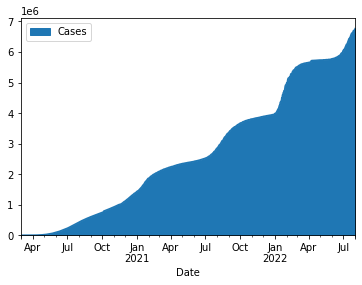

In [62]:
covid.plot(
    x="Date",
    y="Cases",
    kind="area",
)